### **IMPORT**

In [ ]:
!pip install pandas-datareader
!pip install yfinance

In [18]:
import pandas_datareader.data as web
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy as sp

### **DATA LOAD**

In [21]:
yf.pdr_override()

In [22]:
amzn = web.get_data_yahoo('AMZN', start='2000-01-01', end='2022-12-31', progress=False)
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


### **AMZN**

In [23]:
# 수익률 계산
amzn_ret = amzn['Adj Close'].pct_change()
amzn_ret.dropna(inplace=True)
amzn_ret.head()

Date
2000-01-04   -0.083217
2000-01-05   -0.148741
2000-01-06   -0.060036
2000-01-07    0.061010
2000-01-10   -0.005391
Name: Adj Close, dtype: float64

In [24]:
amzn_ret.describe()

count    5786.000000
mean        0.001008
std         0.031910
min        -0.247661
25%        -0.012139
50%         0.000407
75%         0.013604
max         0.344714
Name: Adj Close, dtype: float64

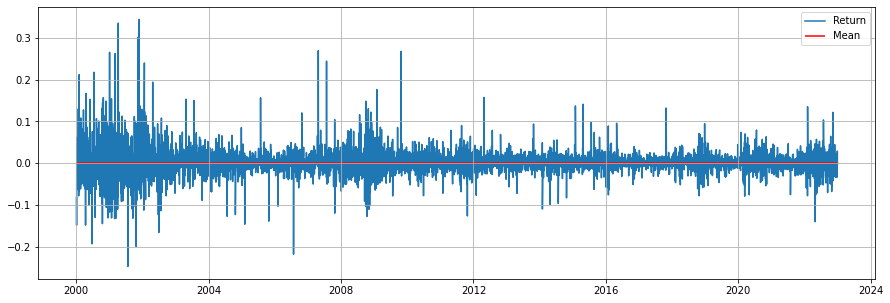

In [25]:
# zorder: Layer의 우선순위, 값이 클수록 앞에나옴

plt.figure(figsize=(15,5))
plt.plot(amzn_ret.index, amzn_ret, label='Return', zorder=0)
# mean값의 그래프
plt.hlines(amzn_ret.mean(), amzn_ret.index[0], amzn_ret.index[-1], label='Mean', color='r', zorder=1)
plt.legend(loc='best')
plt.grid()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adj Close'>

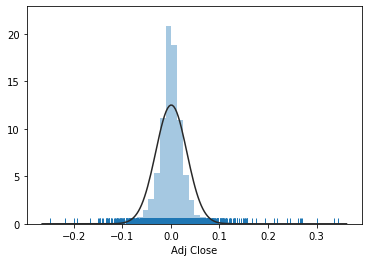

In [26]:
# distplot: 히스토그램을 그리는 plot
# 정규분포를 fit하는 option을 추가할 수 있음
# rug: 값 분포를 나타냄

sns.distplot(amzn_ret, rug=True, kde=False, fit=sp.stats.norm)

In [27]:
# skew(왜도): 정규분포에서 왜곡정도를 말한다. 데이터 분포의 대칭성이 얼마나 결핍되어있는지 측정
#            완전대칭은 skewness 0, 오른쪽 꼬리가 더 길면 positive, 반대면 negative
#            Positive는 평균 이하, Negative는 평균 이상

# kurtois(첨도): 분포 그래프의 꼬리 부분에 관한 것
#               분포에 존재하는 outlier에 대한 척도
#               값이 높다면 많은 outlier를 가지고 있다는 뜻 

sp.stats.skew(amzn_ret), sp.stats.kurtosis(amzn_ret)

(1.138031693637233, 15.412033484608852)

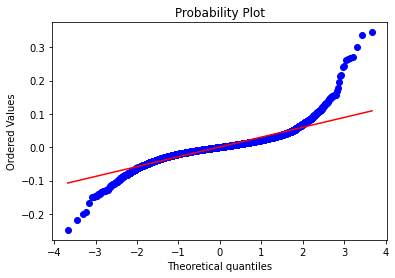

In [28]:
# Q-Q plot
# 직선은 정규분포의 값, 점선은 데이터 값
# 점선과 직선이 일치할수록 데이터는 정규분포를 따른다

ax = plt.subplot()
sp.stats.probplot(amzn_ret, plot=ax)
plt.show()

In [29]:
# K-S Test: 실제 데이터의 누적 확률 분포와 모집단의 누적 확률 분포간의 차이를 거리로 산정한 통계
# 추출한 샘플들이 특정한 확률 분포를 따를 것인지 확인할 때 사용된다.
# 두 개의 샘플 집합을 보고 같은 확률 분포에서 추출되었는지 확인할 때도 사용된다.

sp.stats.kstest(amzn_ret, 'norm')

KstestResult(statistic=0.4560008737987194, pvalue=0.0)

In [30]:
# J-B Test: 데이터의 왜도와 첨도가 정규분포와 일치하는지 판단하는 방법

sp.stats.jarque_bera(amzn_ret)

Jarque_beraResult(statistic=58513.63493905938, pvalue=0.0)

### **5-Industry Correlation**

In [36]:
ind5 = pdr.DataReader('5_Industry_Portfolios', 'famafrench', start='1990-01-01', end='2020-09-01')
ind5[0].head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
1990-01,-7.49,-5.60,-8.56,-7.36,-8.87
1990-02,1.35,2.16,1.57,-2.06,2.52
1990-03,4.51,1.72,4.30,3.85,-0.26
1990-04,-1.55,-3.54,-2.81,0.29,-3.46
1990-05,9.87,7.00,10.79,12.77,9.10


In [37]:
ind5_ret = ind5[0]/100
ind5_ret.head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
1990-01,-0.0749,-0.0560,-0.0856,-0.0736,-0.0887
1990-02,0.0135,0.0216,0.0157,-0.0206,0.0252
1990-03,0.0451,0.0172,0.0430,0.0385,-0.0026
1990-04,-0.0155,-0.0354,-0.0281,0.0029,-0.0346
1990-05,0.0987,0.0700,0.1079,0.1277,0.0910


In [38]:
ind5_ret.corr()

,Cnsmr,Manuf,HiTec,Hlth,Other
Cnsmr,1.000000,0.773350,0.706996,0.660408,0.851185
Manuf,0.773350,1.000000,0.653943,0.574638,0.809202
HiTec,0.706996,0.653943,1.000000,0.540132,0.694832
Hlth,0.660408,0.574638,0.540132,1.000000,0.641547
Other,0.851185,0.809202,0.694832,0.641547,1.000000


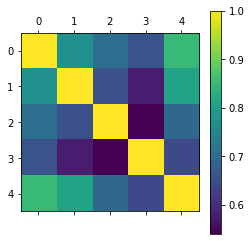

In [45]:
plt.matshow(ind5_ret.corr())
plt.colorbar()

<AxesSubplot:>

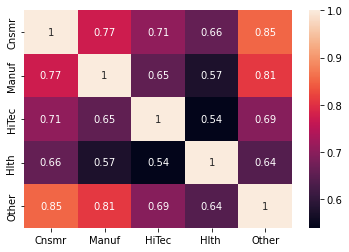

In [46]:
# annot: 수치 포함 여부

sns.heatmap(ind5_ret.corr(), annot=True)

<AxesSubplot:>

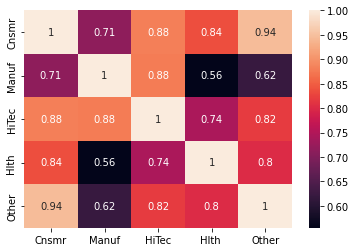

In [48]:
# 2008 금융 위기 때의 상관관계
# 장의 변동성이 증가하면 자산간의 상관관계가 증가한다

crisis1 = ind5_ret.loc['2007-01':'2008-12']
sns.heatmap(crisis1.corr(), annot=True)

<AxesSubplot:>

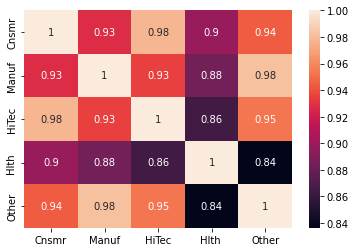

In [49]:
crisis2 = ind5_ret.loc['2020-01':'2020-09']
sns.heatmap(crisis2.corr(), annot=True)

### **10-Industry Correlation**

In [50]:
ind10 = pdr.DataReader('10_Industry_Portfolios', 'famafrench', start='1990-01-01', end='2020-09-01')
ind10[0].head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1990-01,-9.43,-3.84,-6.33,-4.30,-1.28,-13.39,-6.43,-7.36,-5.35,-8.87
1990-02,-0.39,5.13,2.56,3.10,4.11,-0.35,1.99,-2.06,0.21,2.52
1990-03,4.54,2.90,3.92,-0.57,4.46,4.18,5.11,3.85,-0.75,-0.26
1990-04,-0.27,-4.04,-2.73,-3.54,-2.00,-3.46,-2.10,0.29,-5.51,-3.46
1990-05,9.04,7.76,8.08,6.03,12.54,9.38,11.65,12.77,5.43,9.10


In [51]:
ind10_ret = ind10[0]/100
ind10_ret.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1990-01,-0.0943,-0.0384,-0.0633,-0.0430,-0.0128,-0.1339,-0.0643,-0.0736,-0.0535,-0.0887
1990-02,-0.0039,0.0513,0.0256,0.0310,0.0411,-0.0035,0.0199,-0.0206,0.0021,0.0252
1990-03,0.0454,0.0290,0.0392,-0.0057,0.0446,0.0418,0.0511,0.0385,-0.0075,-0.0026
1990-04,-0.0027,-0.0404,-0.0273,-0.0354,-0.0200,-0.0346,-0.0210,0.0029,-0.0551,-0.0346
1990-05,0.0904,0.0776,0.0808,0.0603,0.1254,0.0938,0.1165,0.1277,0.0543,0.0910


<AxesSubplot:>

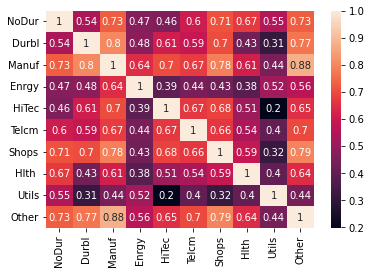

In [52]:
sns.heatmap(ind10_ret.corr(), annot=True)

<AxesSubplot:>

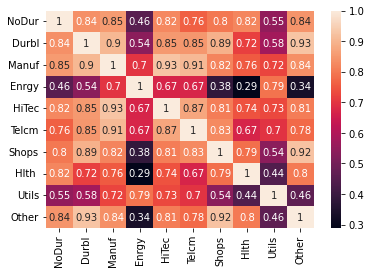

In [53]:
crisis3 = ind10_ret.loc['2007-01':'2008-12']
sns.heatmap(crisis3.corr(), annot=True)

<AxesSubplot:>

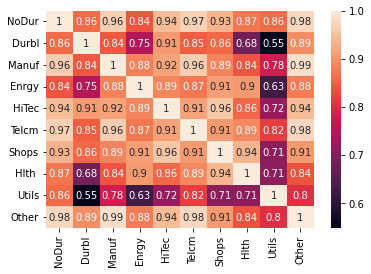

In [54]:
crisis4 = ind10_ret.loc['2020-01':'2020-09']
sns.heatmap(crisis4.corr(), annot=True)

### **Volatility Measurement**

In [57]:
# VIX(Volatility Index): 변동성을 나타내는 index, fear index

vix = web.get_data_yahoo('^VIX', start='2000-01-01', end='2020-09-01', progress=False)
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0


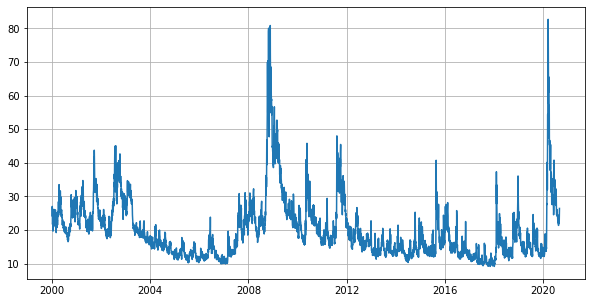

In [58]:
# 변동성 EDA

plt.figure(figsize=(10,5))
plt.plot(vix.index, vix.Close)
plt.grid()

### **Trimmed mean**

In [ ]:
# 주식 수익률이 skew되어있는데, trimmed mean을 계산하고 싶다.
# 수익률을 가장 낮은 것부터 가장 큰 것까지 나열되어 있는데, outlier가 존재하는 경우에는 평균에
# 영향을 많이 받기 때문에 outlier에 영향을 받지 않는 trimmed mean을 많이 사용한다.
# 보통 양쪽 끝 n%를 빼고 구현한다.

# 이번에는 개수로 해본다.

In [62]:
wtw = web.get_data_yahoo('WTW', start='2022-01-01', end='2023-01-01', progress=False)
wtw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,237.279999,237.949997,234.199997,235.570007,232.092224,848600
2022-01-04,232.610001,239.570007,232.610001,238.669998,235.146454,952100
2022-01-05,239.429993,239.649994,236.240005,237.009995,233.510956,1070500
2022-01-06,236.360001,238.100006,234.220001,234.339996,230.880371,1128100
2022-01-07,233.050003,235.500000,231.259995,231.559998,228.141418,1233500


In [65]:
wtw_ret = wtw['Adj Close'].pct_change()
wtw_ret.dropna(inplace=True)
wtw_ret.head()

Date
2022-01-04    0.013160
2022-01-05   -0.006955
2022-01-06   -0.011265
2022-01-07   -0.011863
2022-01-10    0.004578
Name: Adj Close, dtype: float64

In [67]:
wtw_ret.describe()

count    250.000000
mean       0.000332
std        0.015695
min       -0.061337
25%       -0.010570
50%        0.000002
75%        0.010382
max        0.040811
Name: Adj Close, dtype: float64

In [74]:
# 특정 값을 포함하는 인덱스 가져오기
wtw_ret.index[wtw_ret==wtw_ret.max()]

DatetimeIndex(['2022-10-28'], dtype='datetime64[ns]', name='Date', freq=None)

In [81]:
wtw_sort = wtw_ret.sort_values()
wtw_sort

Date
2022-04-29   -0.061337
2022-02-08   -0.045613
2022-09-13   -0.040690
2022-06-03   -0.032857
2022-02-23   -0.028584
                ...   
2022-06-24    0.035729
2022-01-28    0.036325
2022-03-15    0.038437
2022-11-10    0.038661
2022-10-28    0.040811
Name: Adj Close, Length: 250, dtype: float64